# Plot Machine learning

#New Plot

KeyError: 'True EURUSD_pct_change'

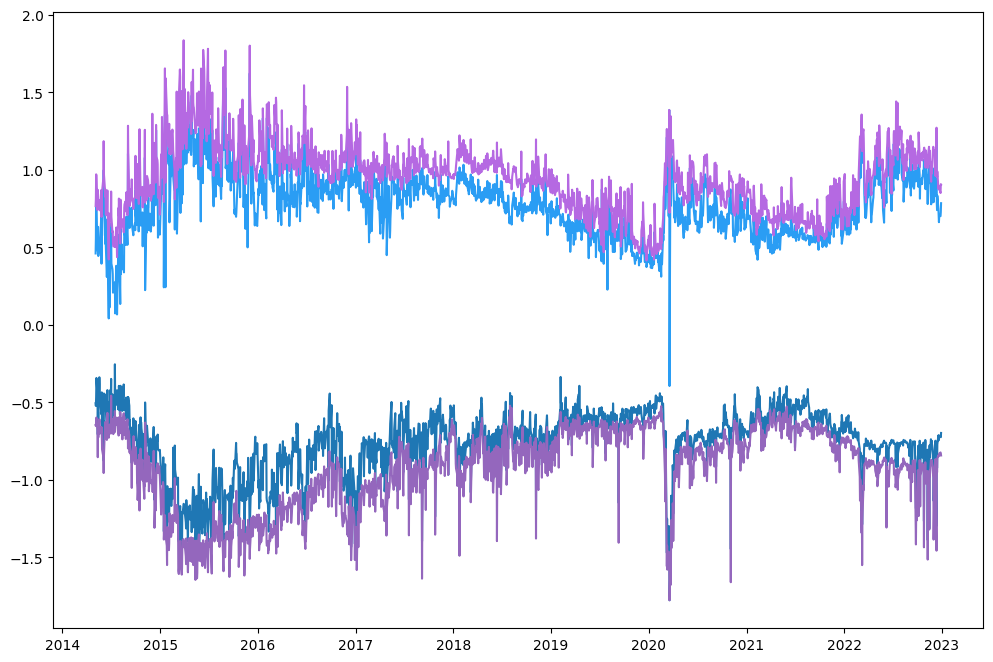

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Excel files
file_path1 = '/content/CatBoost_IV_VRP_ES_VaR_CROSS_predictions copy.xlsx'
file_path2 = '/content/CatBoost_IV_VRP_ES_predictions.xlsx'
file_path3 = '/content/FinalAgarch_predictions.xlsx'

df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)

df3 = pd.read_excel(file_path3)

# Manually specify the columns to plot
columns_to_plot1 = ['VaR_0.050','VaR_0.950']  # Replace with your actual column names from the first file
columns_to_plot2 = ['ES_0.05', 'ES_0.95']  # Replace with your actual column names from the second file

columns_to_plot3 = ['gIV_sstd_AES_0.05']


def standardize_column(df, column):
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    return df

#df3 = standardize_column(df3,'M_1_Put_50')
columns_to_plot4 = ['True_EURUSD_pct_change']


#colors1 = ['#1f77b4', '#9467bd']
#colors2 = ['#17becf', '#D70040']

colors1 = ['#1f77b4', '#2a9df4']  # Different yet stronger shades of blue for VaR
colors2 = ['#9467bd', '#b569e2']

# Plotting
plt.figure(figsize=(12, 8))


for i,col in enumerate(columns_to_plot1):
    plt.plot(df1['Date'], df1[col], label=f'{col} from CastBoost_IV_RR_VRP',color = colors1[i],linewidth=1.5,)

for k,col in enumerate(columns_to_plot2):
    plt.plot(df2['Date'], df2[col], label=f'{col} from Catboost_IV_RR_VRP',color = colors2[k],linewidth=1.5,)

#for col in columns_to_plot3:
#    plt.plot(df3['Date'], df3[col], label=f'{col} from Garch_IV_RR_VRP')

for col in columns_to_plot4:
    plt.plot(df2['Date'], df2[col], 'o', label=f'{col} Returns', color='black',markersize=2)

#plt.scatter(df2['Date'], df2[col], label=f'{col} Returns', color='black', s=10)


plt.xlabel('Date',fontsize=20)
plt.ylabel('Daily Returns',fontsize=20)
plt.legend()
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.tight_layout()
plt.show()



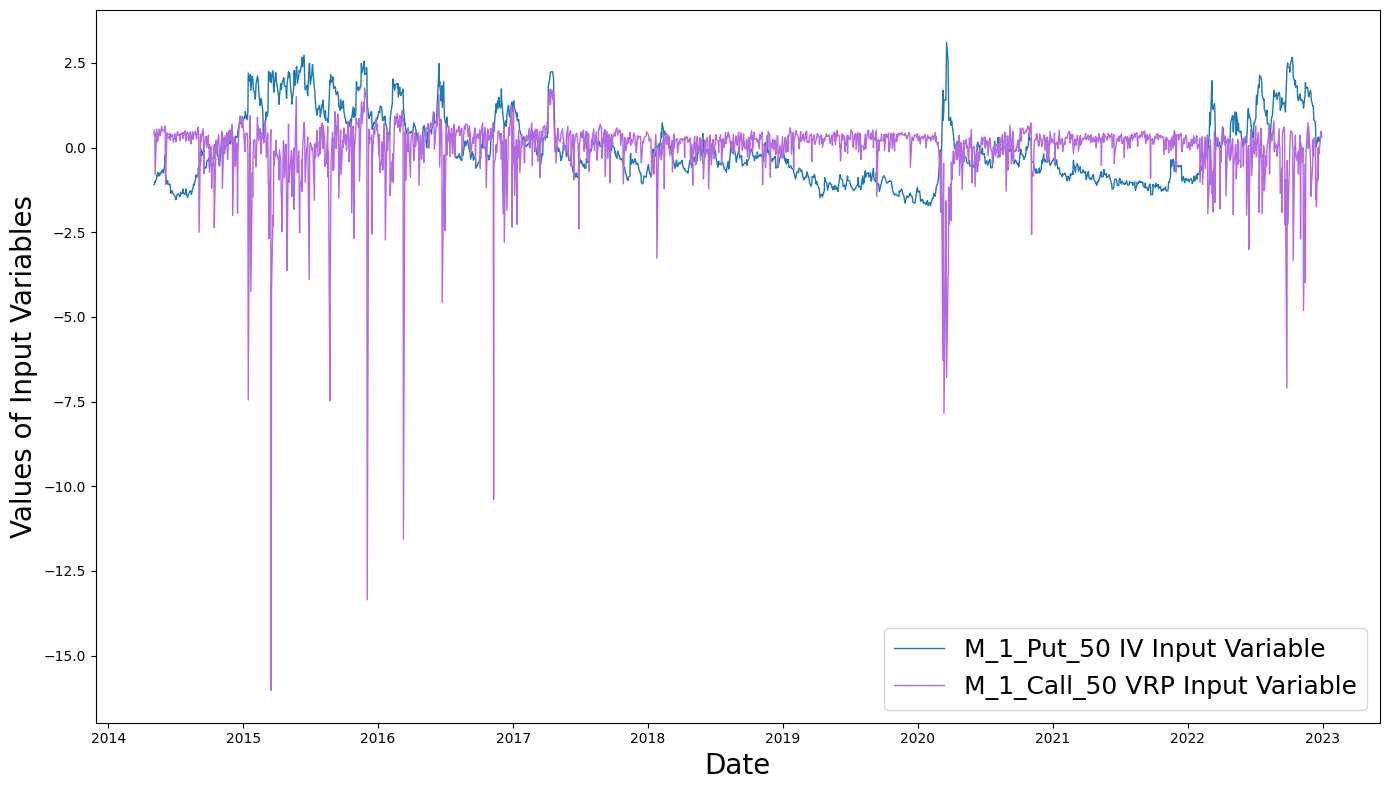

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file_path3 = '/content/FinalAgarch_predictions_copy.xlsx'
df3 = pd.read_excel(file_path3)
def standardize_column(df, column):
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    return df

colors1 = ['#1f77b4', '#2a9df4']
#Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))


columns_to_plot1 = ['VaR_0.050','VaR_0.950']  # Replace with your actual column names from the first file
columns_to_plot2 = ['ES_0.01']  # Replace with your actual column names from the second file

columns_to_plot3 = ['gIV_sstd_AES_0.01']

#columns_to_plot4 = ['M_1_Call_50'] #VRP
#columns_to_plot4 = ['M_1_Put_50'] #IV


colors1 = ['#1f77b4', '#b569e2']

"""
#Plot for two models
# Plot the columns from the second file (CatBoost_IV)
for col in columns_to_plot2:
    ax1.plot(df2['Date'], df2[col], label="0.05 ES from Catboost-IV-VRP") #, color=colors1[0])
# Plot the columns from the third file (Garch_IV)
for col in columns_to_plot3:
    ax1.plot(df3['Date'], df3[col], label="0.05 ES from EGARCH-IV-VRP")#,color=colors1[1])
"""
# Create a secondary y-axis for IV input variable
#ax2 = ax1.twinx()

# Plot the IV input variable on the secondary y-axis
#for col in columns_to_plot4:


#Plot for IV and VRP
#"""
df3 = standardize_column(df3,'M_1_Put_50')
df3 = standardize_column(df3,'M_1_Call_50')

ax1.plot(df3['Date'], df3['M_1_Put_50'], label=f'M_1_Put_50 IV Input Variable', color=colors1[0], linewidth=1)
ax1.plot(df3['Date'], df3['M_1_Call_50'], label=f'M_1_Call_50 VRP Input Variable', color=colors1[1], linewidth=1)
#"""


# Add legends for both axes
#lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1, loc='lower right', fontsize=18)
ax1.legend(loc='lower right', fontsize=18)

# Add titles and labels
#ax1.set_title('Comparison of GARCH and CatBoost using IV over time')
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Values of Input Variables',fontsize=20)
#ax2.set_ylabel('Values of Montly VRP',fontsize=20)
ax1.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

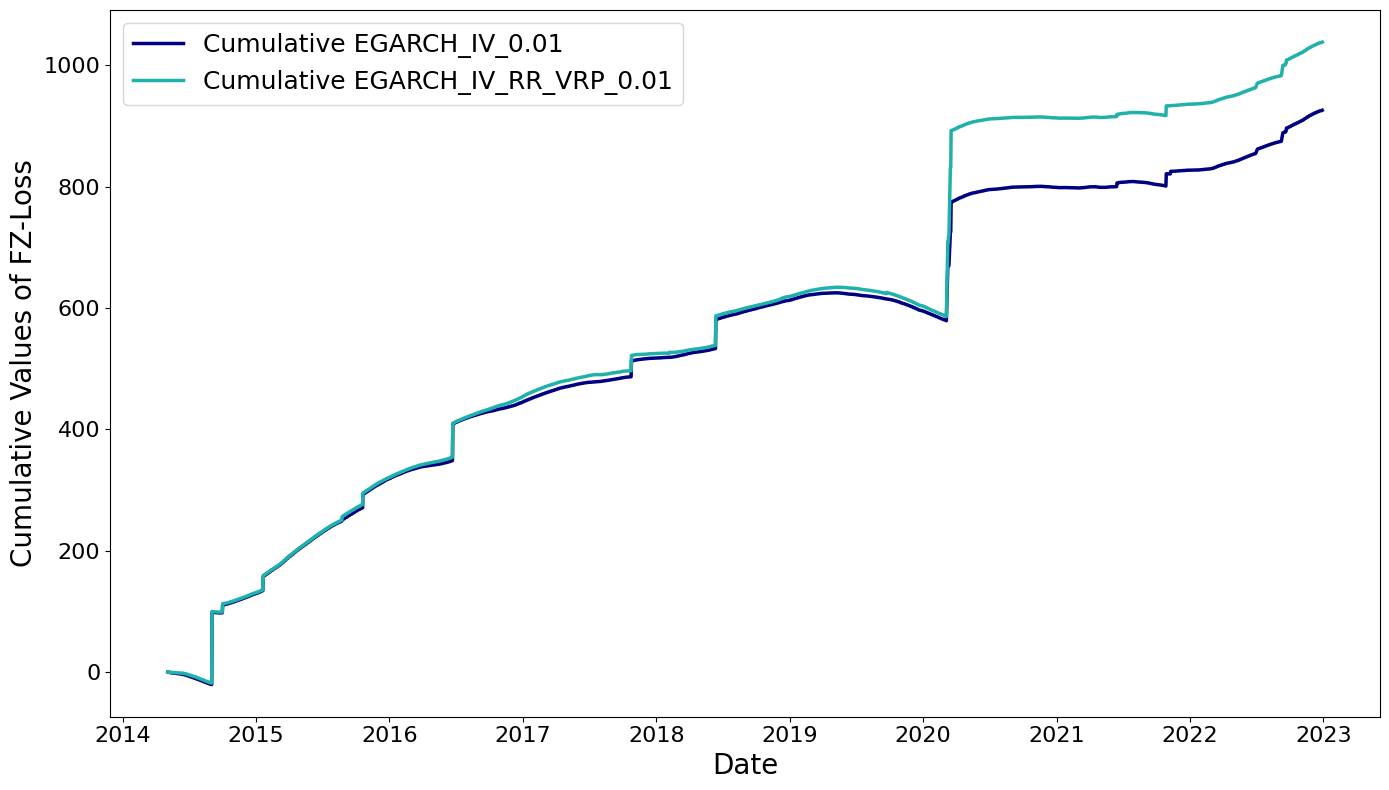

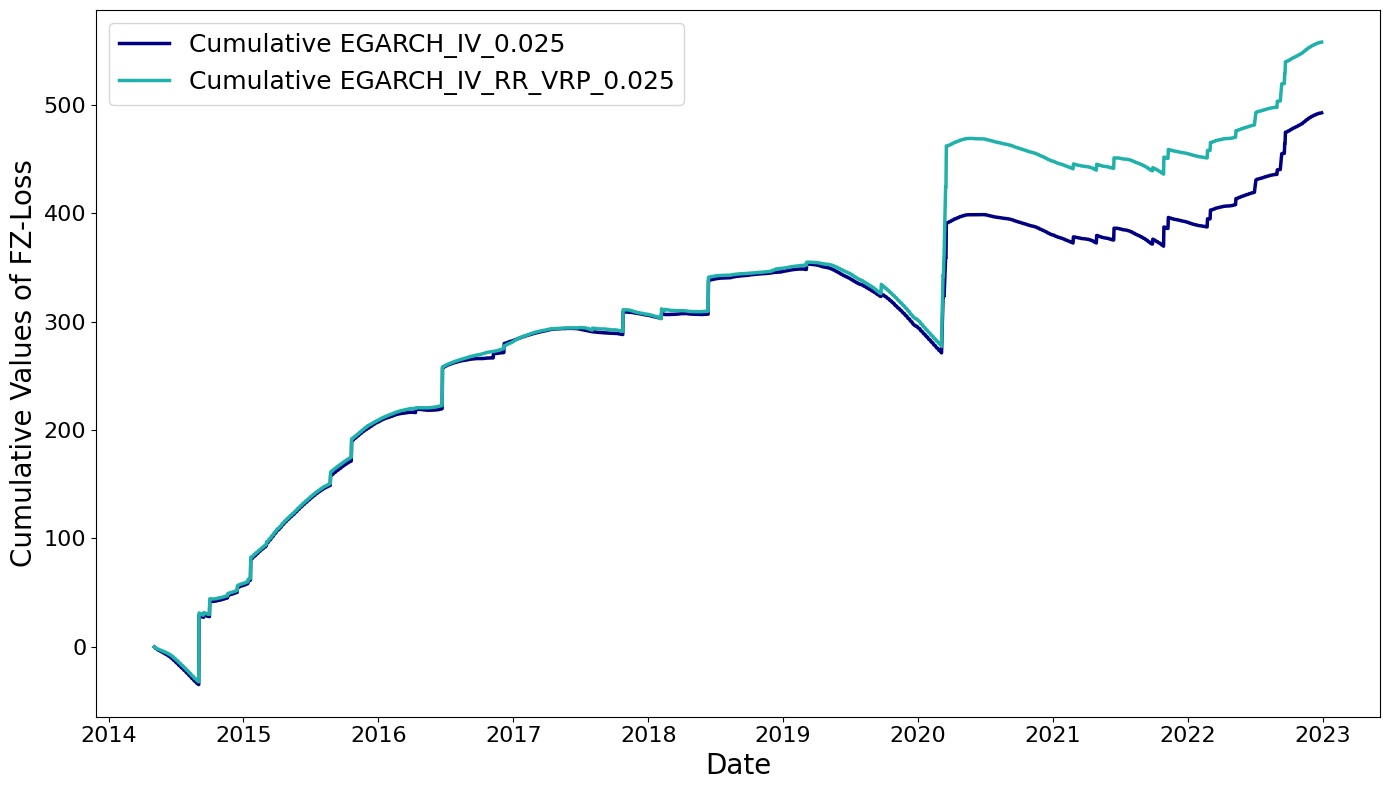

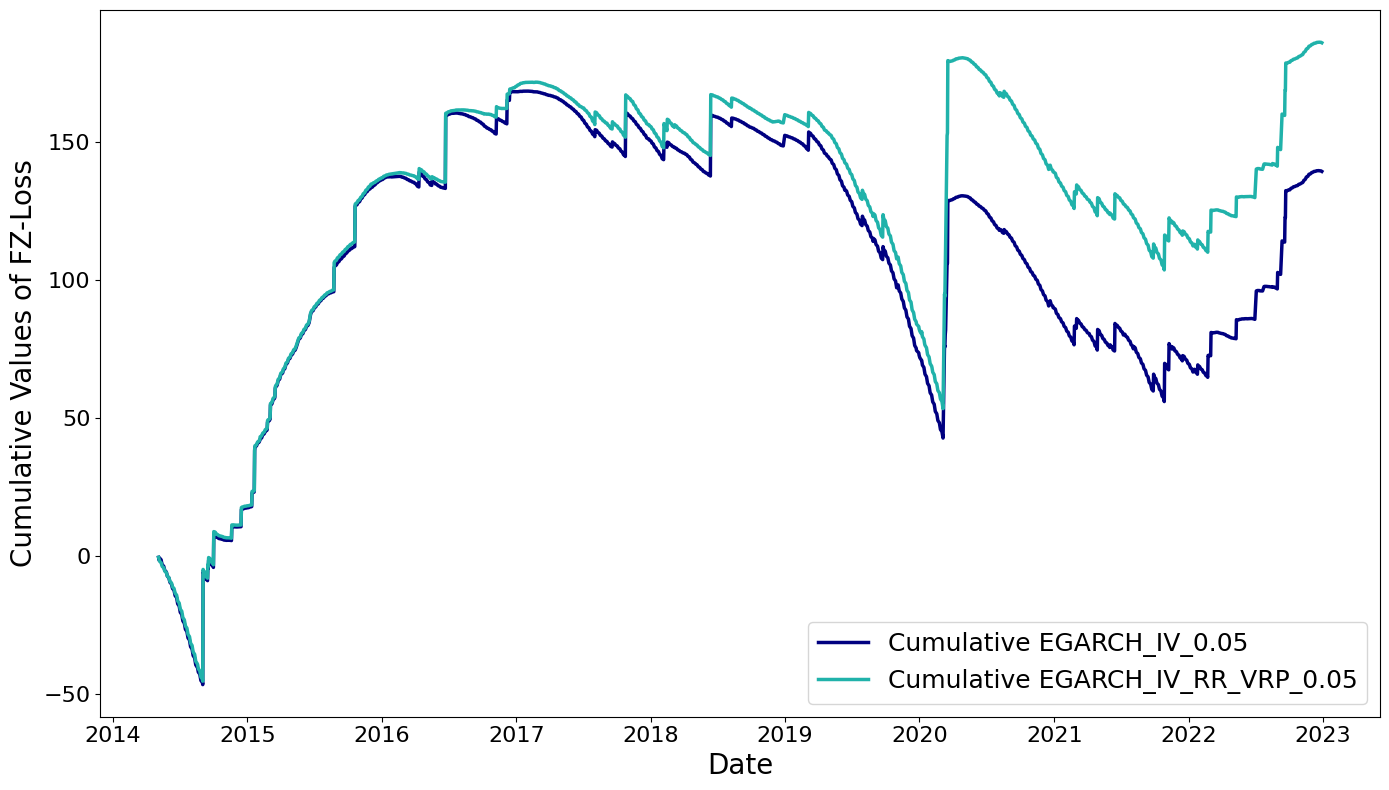

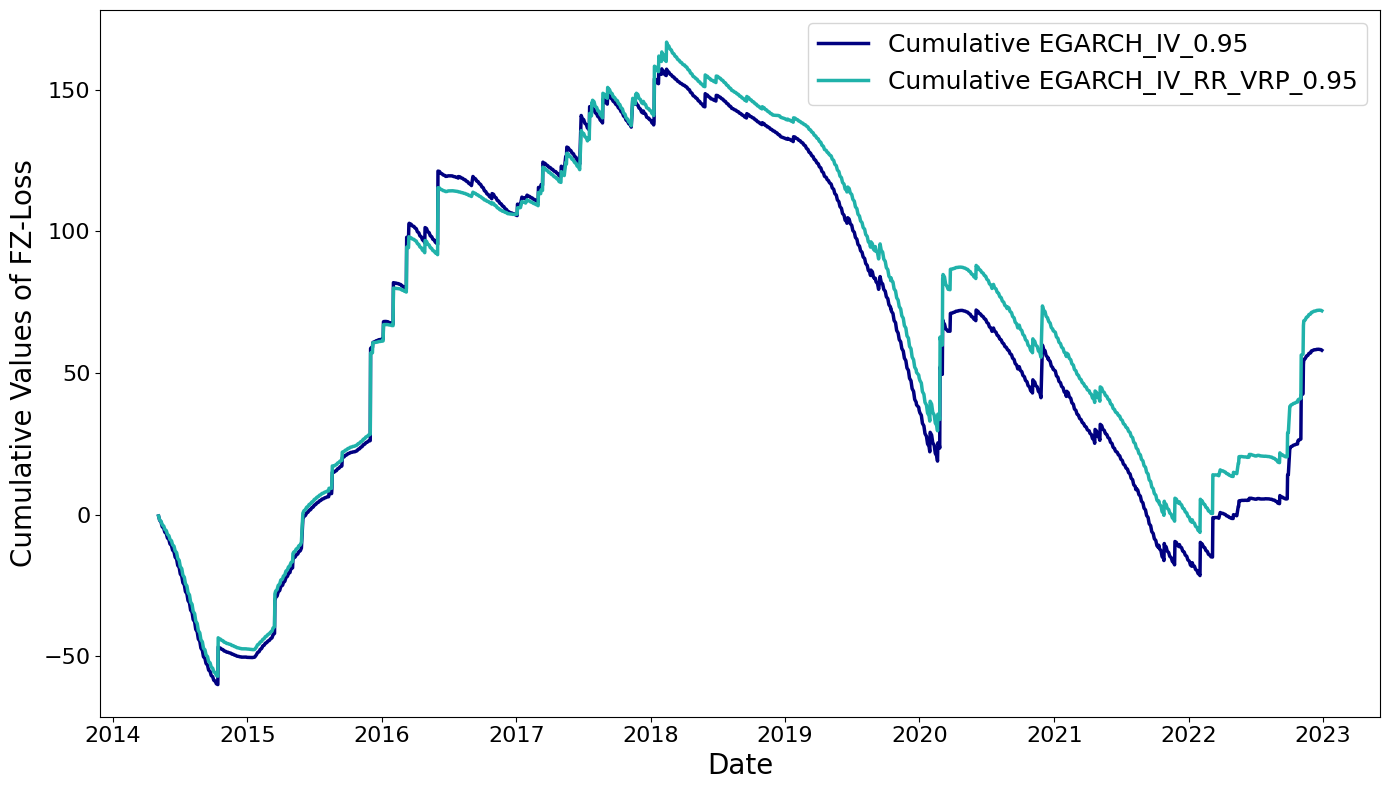

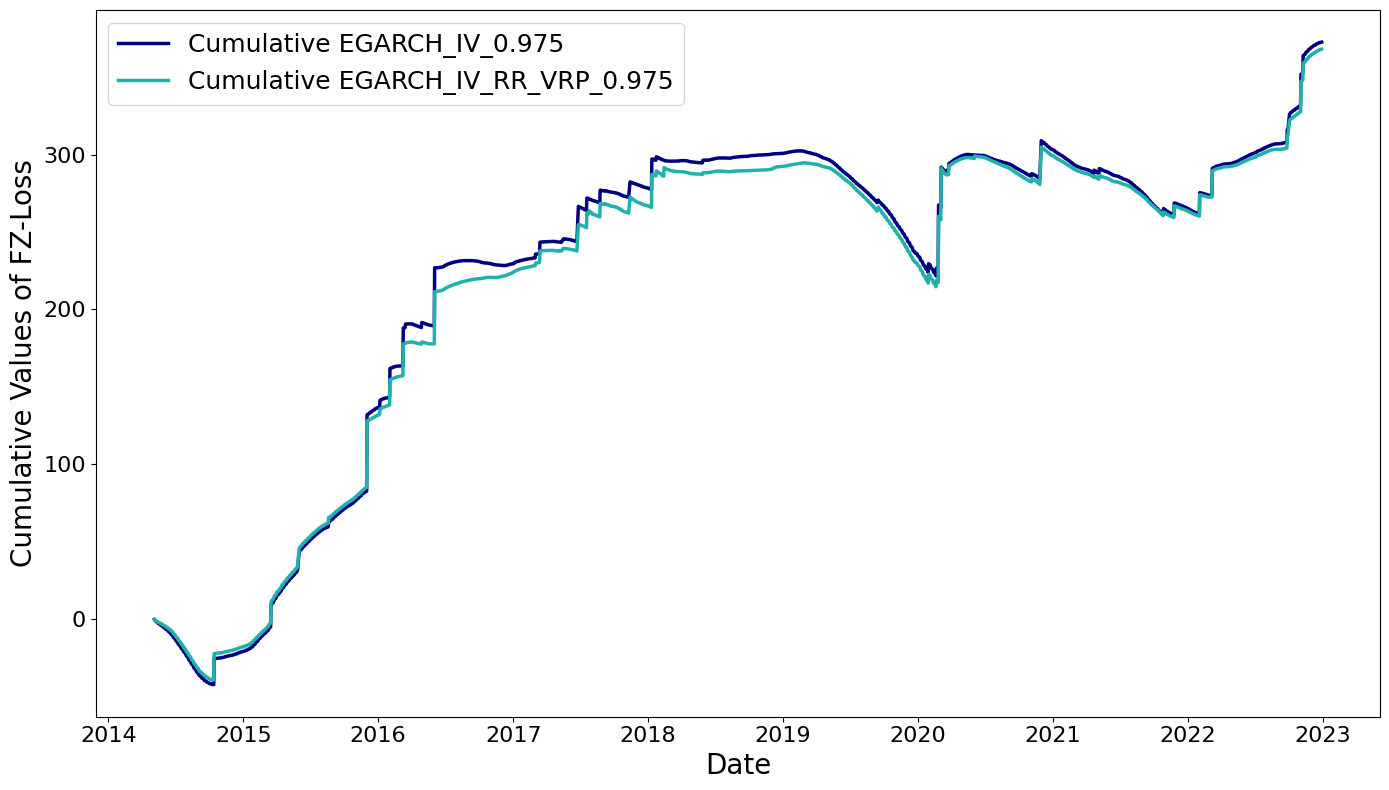

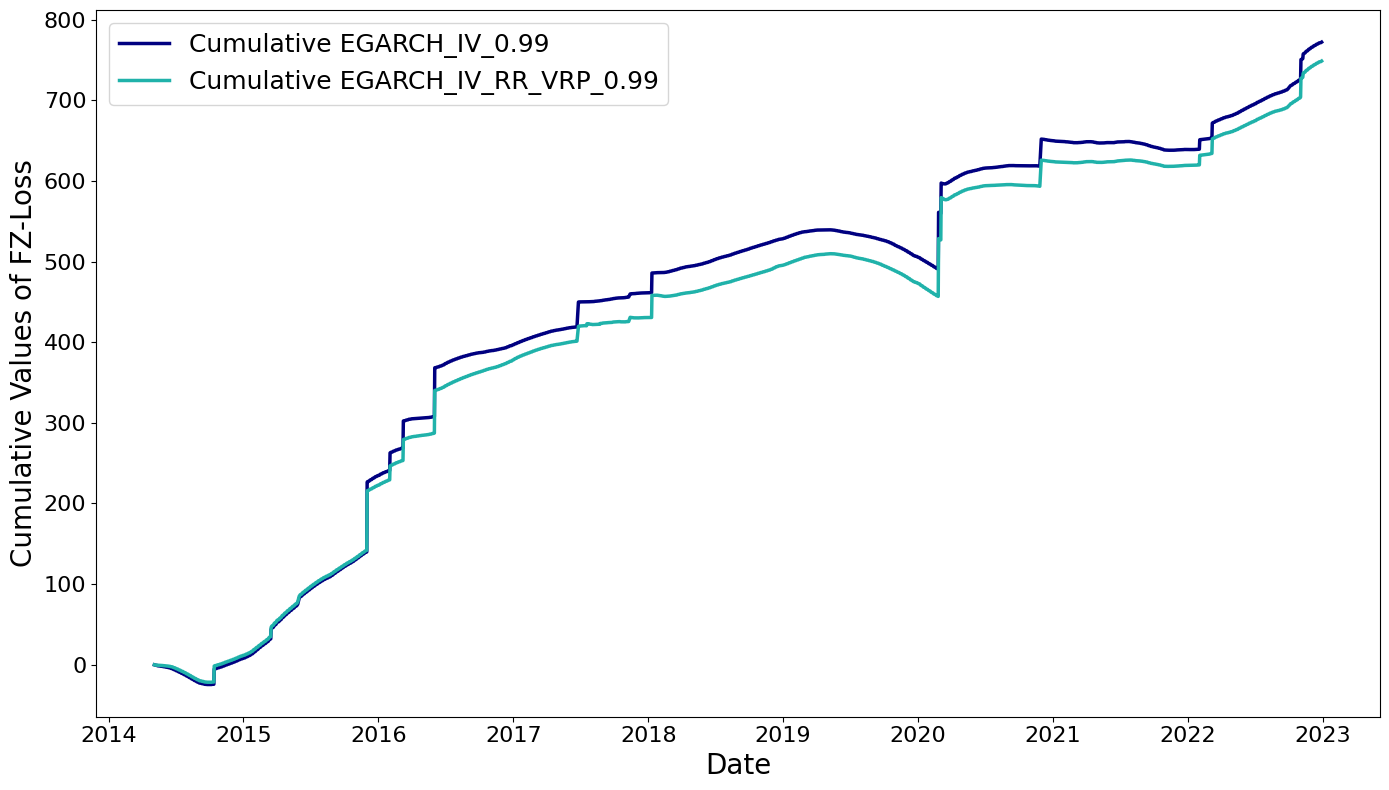

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/All_FZ copy.xlsx'
file_path2 = '/content/CatBoost_IV_ES_predictions.xlsx'

df = pd.read_excel(file_path)
df2 = pd.read_excel(file_path2)

fi2 = pd.read_excel(file_path)


quantiles = [0.01, 0.025, 0.05, 0.95, 0.975, 0.99]

colors1 = ['#1f77b4', '#9467bd']
colors2 = ['#17becf', '#d62728']

colors3 = ['navy', 'lightseagreen']

for i in range(len(quantiles)):

    # Manually specify the columns to plot
    columns_to_plot = [f'EGARCH_IV_{quantiles[i]}', f'EGARCH_IV_RR_VRP_{quantiles[i]}']  # Replace with your actual column names

    # Compute the cumulative sums for the specified columns
    for col in columns_to_plot:
        df[f'Cumulative_{col}'] = df[col].cumsum()

    # Plotting
    plt.figure(figsize=(14, 8))

    # Plot the cumulative columns with thicker lines
    for y,col in enumerate(columns_to_plot):

      plt.plot(df2['Date'], df[f'Cumulative_{col}'], label=f'Cumulative {col}', linewidth=2.5, color = colors3[y])

    # Adjust the title and axis labels with larger fonts
    #plt.title(f'Cumulative Sum of FZ-loss on ES_{quantiles[i]}', fontsize=25)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Cumulative Values of FZ-Loss', fontsize=20)

    plt.legend(fontsize=18)
    plt.xticks(rotation=0, fontsize=16)
    plt.yticks(rotation=0, fontsize=16)
    plt.tight_layout()
    plt.show()


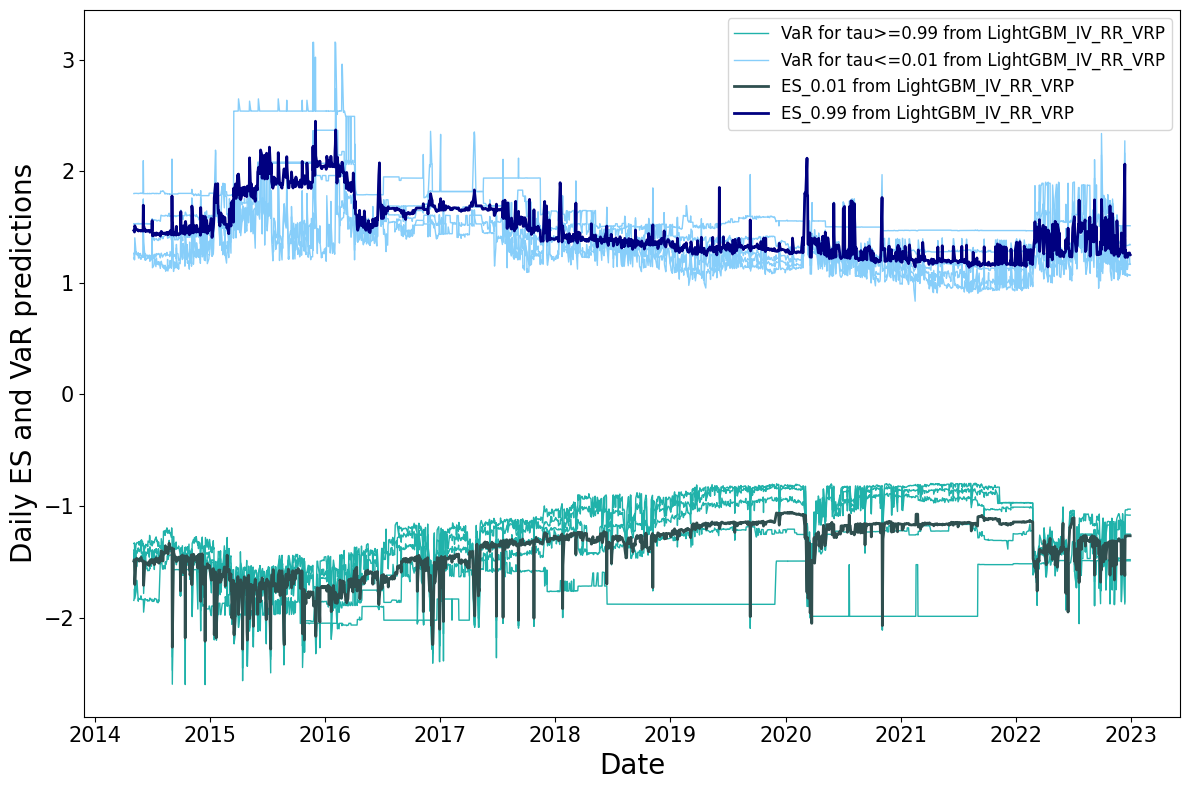

In [ ]:

# Load the Excel files
file_path1 = '/content/LightGBM_IV_RR_VRP_ES_VaR_CROSS_predictions copy.xlsx'
file_path2 = '/content/LightGBM_IV_RR_VRP_ES_predictions.xlsx'
file_path3 = '/content/FinalAgarch_predictions.xlsx'

df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)

df3 = pd.read_excel(file_path3)

# Manually specify the columns to plot
columns_to_plot1 = ['VaR_0.002','VaR_0.004','VaR_0.006','VaR_0.008','VaR_0.010']  # Replace with your actual column names from the first file
columns_to_plot2 = ['ES_0.01','ES_0.99']  # Replace with your actual column names from the second file

columns_to_plot3 = ['VaR_0.992','VaR_0.994','VaR_0.996','VaR_0.998','VaR_0.990']  # Replace with your actual column names from the first file


#df3 = standardize_column(df3,'M_1_Put_50')
columns_to_plot4 = ['True_EURUSD_pct_change']


#colors2 = ['#17becf', '#d62728']
colors2 = ['darkslategray', 'navy']  # Different yet stronger shades of blue for VaR
#009da3
#D70040
#colors3 = ['navy', 'lightseagreen']


plt.figure(figsize=(12, 8))


for i,col in enumerate(columns_to_plot1):
  if i<4:
    plt.plot(df1['Date'], df1[col], label=None,color = 'lightseagreen',linewidth=1.0,)
  else:
    plt.plot(df1['Date'], df1[col], label=f'VaR for tau>=0.99 from LightGBM_IV_RR_VRP',color = 'lightseagreen',linewidth=1.0,)




for k,col in enumerate(columns_to_plot3):
  if k<4:
    plt.plot(df1['Date'], df1[col], label=None,color = 'lightskyblue',linewidth=1.0,)
  else:
    plt.plot(df1['Date'], df1[col], label=f'VaR for tau<=0.01 from LightGBM_IV_RR_VRP',color = 'lightskyblue',linewidth=1.0,)


for k,col in enumerate(columns_to_plot2):
    plt.plot(df2['Date'], df2[col], label=f'{col} from LightGBM_IV_RR_VRP',color = colors2[k],linewidth=2,)
#for col in columns_to_plot4:
#    plt.plot(df2['Date'], df2[col], 'o', label=f'{col} Returns', color='black',markersize=2)

#plt.scatter(df2['Date'], df2[col], label=f'{col} Returns', color='black', s=10)


plt.xlabel('Date',fontsize=20)
plt.ylabel('Daily ES and VaR predictions',fontsize=20)
plt.legend(fontsize=12)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.tight_layout()
plt.show()

